[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical Variable: Gender

Quantitative Variable: Age

Discrete Variable: Hometown

Continuous Variable: Temperature

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions. 

(array([ 1., 10., 11.,  4.,  4.,  2.,  0.,  0.,  0.,  3.]),
 array([ 2.  ,  3.45,  4.9 ,  6.35,  7.8 ,  9.25, 10.7 , 12.15, 13.6 ,
        15.05, 16.5 ]),
 <BarContainer object of 10 artists>)

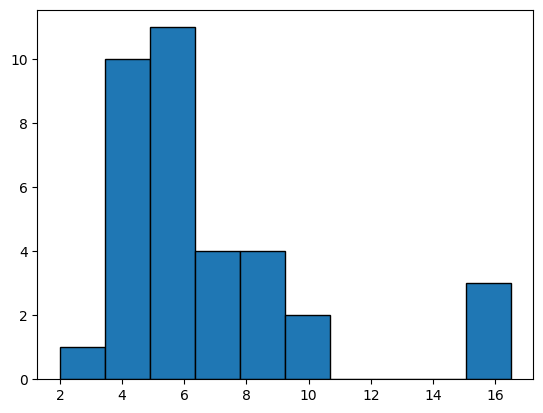

In [155]:
plt.hist(carbon_west["CO2"], edgecolor='black')

Part b. Find the mean, median, and standard deviation. 

In [156]:
carbon_west.describe()

,CO2
count,35.000000
mean,6.717143
std,3.356949
min,2.000000
25%,4.450000
50%,5.900000
75%,8.000000
max,16.500000


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [157]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [158]:
murders_without_dc = murders[murders['state'] != 'DC']
murders_without_dc_description = murders_without_dc.describe()

In [159]:
mean = murders_without_dc_description.loc['mean']['murder']
std = murders_without_dc_description.loc['std']['murder']
print(f'Mean: {mean}')
print(f'Standard Deviation: {std}')

Mean: 4.874
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [160]:
min = murders_without_dc_description.loc['min']['murder']
firstQuartile = murders_without_dc_description.loc['25%']['murder']
secondQuartile = murders_without_dc_description.loc['50%']['murder']
thirdQuartile = murders_without_dc_description.loc['75%']['murder']
max = murders_without_dc_description.loc['max']['murder']
print(f'Min: {min}')
print(f'25%: {firstQuartile}')
print(f'50%: {secondQuartile}')
print(f'75%: {thirdQuartile}')
print(f'Max: {max}')

Min: 1.0
25%: 2.625
50%: 4.85
75%: 6.175
Max: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?


It seems to me like the mean and the range are more affected by this outlier. The median and then inter-quartile range are more resistant to outliers.

In [161]:
print(murders.describe())

          murder
count  51.000000
mean    5.252941
std     3.725391
min     1.000000
25%     2.650000
50%     5.000000
75%     6.450000
max    24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [162]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home. 

Text(0.5, 0, 'Size (Square Ft)')

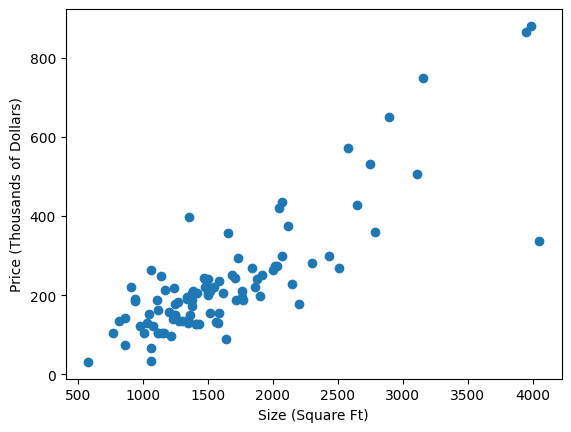

In [163]:
size = houses['size']
price = houses['price']

plt.scatter(y=price, x=size)
plt.ylabel('Price (Thousands of Dollars)')
plt.xlabel('Size (Square Ft)')

Part b. Find the correlation between the two variables.

In [164]:
correlation = size.corr(price)
print(f'Correlation: {correlation}')

Correlation: 0.8337847885586536


Part c. Find and plot the regression line on top of the scatterplot. 

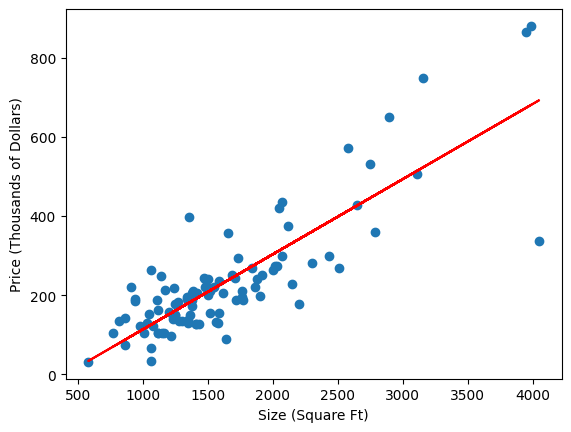

In [165]:
x = pd.DataFrame(size, columns=['size'])
y = price

model = LinearRegression()
model.fit(x, y)

plt.scatter(size, price, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.ylabel('Price (Thousands of Dollars)')
plt.xlabel('Size (Square Ft)')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

<Figure size 600x400 with 0 Axes>

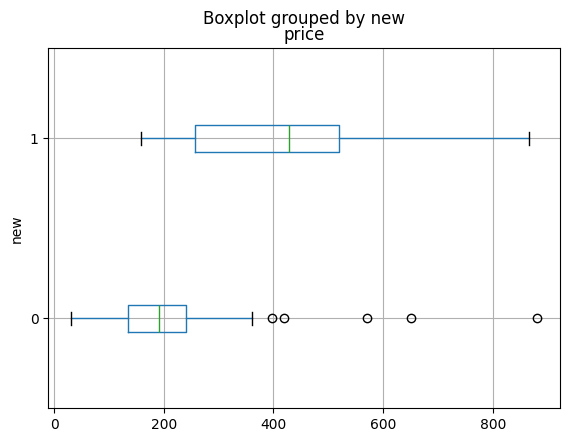

In [166]:
plt.figure(figsize=(6,4))
houses.boxplot(column='price', by='new', vert=False)
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

As size increases, price increases. This is proven by the high correlation value between the two of 0.83.

Price is also affected by whether the house is new or not. Newer houses cost more. This can be seen using the box plot above, which shows that old houses are much cheaper than new ones, except for some outliers.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [167]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
print(happy.head())

   subject happiness marital gender
0        1   1     1    male    NaN
1        2   1     1    male    NaN
2        3   1     1    male    NaN
3        4   1     1    male    NaN
4        5   1     1    male    NaN


In [168]:
pd.crosstab(happy['happiness'], happy['marital'], normalize='index')

marital,fe,fem,mal,male
happiness,,,,
1,1.0,0.000000,0.000000,0.000000
1 1,0.0,0.023697,0.507109,0.469194
1 2,0.0,0.000000,1.000000,0.000000
1 3,0.0,0.000000,1.000000,0.000000
2,1.0,0.000000,0.000000,0.000000
2 1,0.0,0.000000,1.000000,0.000000
2 2,0.0,0.000000,1.000000,0.000000
2 3,0.0,0.000000,1.000000,0.000000
3,1.0,0.000000,0.000000,0.000000
